#Libraries and data

In [ ]:
#changing directory
%cd /content/drive/MyDrive/Conjoint Analysis

/content/drive/MyDrive/Conjoint Analysis


In [ ]:
!pip install squarify

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import squarify

In [ ]:
#Data
df = pd.read_csv('netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


#Prepare the data

In [ ]:
#Isolate X and Y
y = df['selected']
x = df.drop(columns = ['selected', 'customerid'])
x.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [ ]:
#Transform dummy variables
x_dummy = pd.get_dummies(x, columns = x.columns)
x_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


#Logistic Regression

In [ ]:
#Regression
model = sm.OLS(y, x_dummy, family = sm.families.Binomial()).fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     16.03
Date:                Fri, 01 Sep 2023   Prob (F-statistic):           9.96e-46
Time:                        20:41:09   Log-Likelihood:                -2046.2
No. Observations:                3000   AIC:                             4128.
Df Residuals:                    2982   BIC:                             4237.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.0600      0.020     -3.012      0.003      -0.099      -0.021
NumberAccounts_2                 0.0826      0.020      4.031      0.000       0.042       0.123
NumberAccounts_3                 0.0947      0.020      4.657      0.000       0.055       0.135
NumberAccounts_4                 0.1289      0.019      6.641      0.000       0.091       0.167
NumberAccounts_5                 0.1306      0.020      6.670      0.000       0.092       0.169
NumberAccounts_6                 0.2152      0.019     11.421      0.000       0.178       0.252
price_8                          0.1693      0.020      8.619      0.000       0.131       0.208
price_10                         0.1508      0.020      7.513      0.000       0.111       0.190
price_12                         0.1465      0.019      7.689      0.000       0.109       0.184
price_15                         0.1042      0.020      5.335      0.000       0.066       0.143
price_18                         0.0754      0.020      3.739      0.000       0.036       0.115
price_20                        -0.0543      0.020     -2.722      0.007      -0.093      -0.015
ExtraContent_Disney              0.1530      0.020      7.579      0.000       0.113       0.193
ExtraContent_HBO                 0.1534      0.020      7.824      0.000       0.115       0.192
ExtraContent_Marvel              0.1337      0.019      6.885      0.000       0.096       0.172
ExtraContent_Prime originals     0.1298      0.020      6.503      0.000       0.091       0.169
ExtraContent_Soccer              0.0523      0.020      2.665      0.008       0.014       0.091
ExtraContent_less content       -0.0301      0.020     -1.531      0.126      -0.069       0.008
ads_none                         0.2488      0.013     19.538      0.000       0.224       0.274
ads_one_per_day                  0.2258      0.013     17.336      0.000       0.200       0.251
ads_one_per_show                 0.1175      0.013      9.060      0.000       0.092       0.143
==============================================================================
Omnibus:                    13769.665   Durbin-Watson:                   2.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.845
Skew:                          -0.010   Prob(JB):                     3.96e-77
Kurtosis:                       1.322   Cond. No.                     6.94e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.2e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#Conjoint Analysis Preparation

In [ ]:
#DF with results
df_results = pd.DataFrame(
{'param_name': model.params.keys(),
 'partworth': model.params.values,
 'pval': model.pvalues})
df_results.head()

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.059992,2.614658e-03
NumberAccounts_2,NumberAccounts_2,0.082605,5.680964e-05
NumberAccounts_3,NumberAccounts_3,0.094706,3.346106e-06
NumberAccounts_4,NumberAccounts_4,0.128909,3.689472e-11
NumberAccounts_5,NumberAccounts_5,0.130610,3.046904e-11


In [ ]:
#Organizing the graph
df_results = df_results.sort_values(by = "partworth", ascending = True)

In [ ]:
#Marking statistically significant rows
df_results['is_significant_95'] = (df_results['pval'] < 0.05)
df_results['color'] = ['blue' if x else 'red' for x in df_results['is_significant_95']]
df_results.head()

,param_name,partworth,pval,is_significant_95,color
NumberAccounts_1,NumberAccounts_1,-0.059992,0.002615,True,blue
price_20,price_20,-0.054293,0.006532,True,blue
ExtraContent_less content,ExtraContent_less content,-0.030061,0.125950,False,red
ExtraContent_Soccer,ExtraContent_Soccer,0.052283,0.007731,True,blue
price_18,price_18,0.075401,0.000189,True,blue


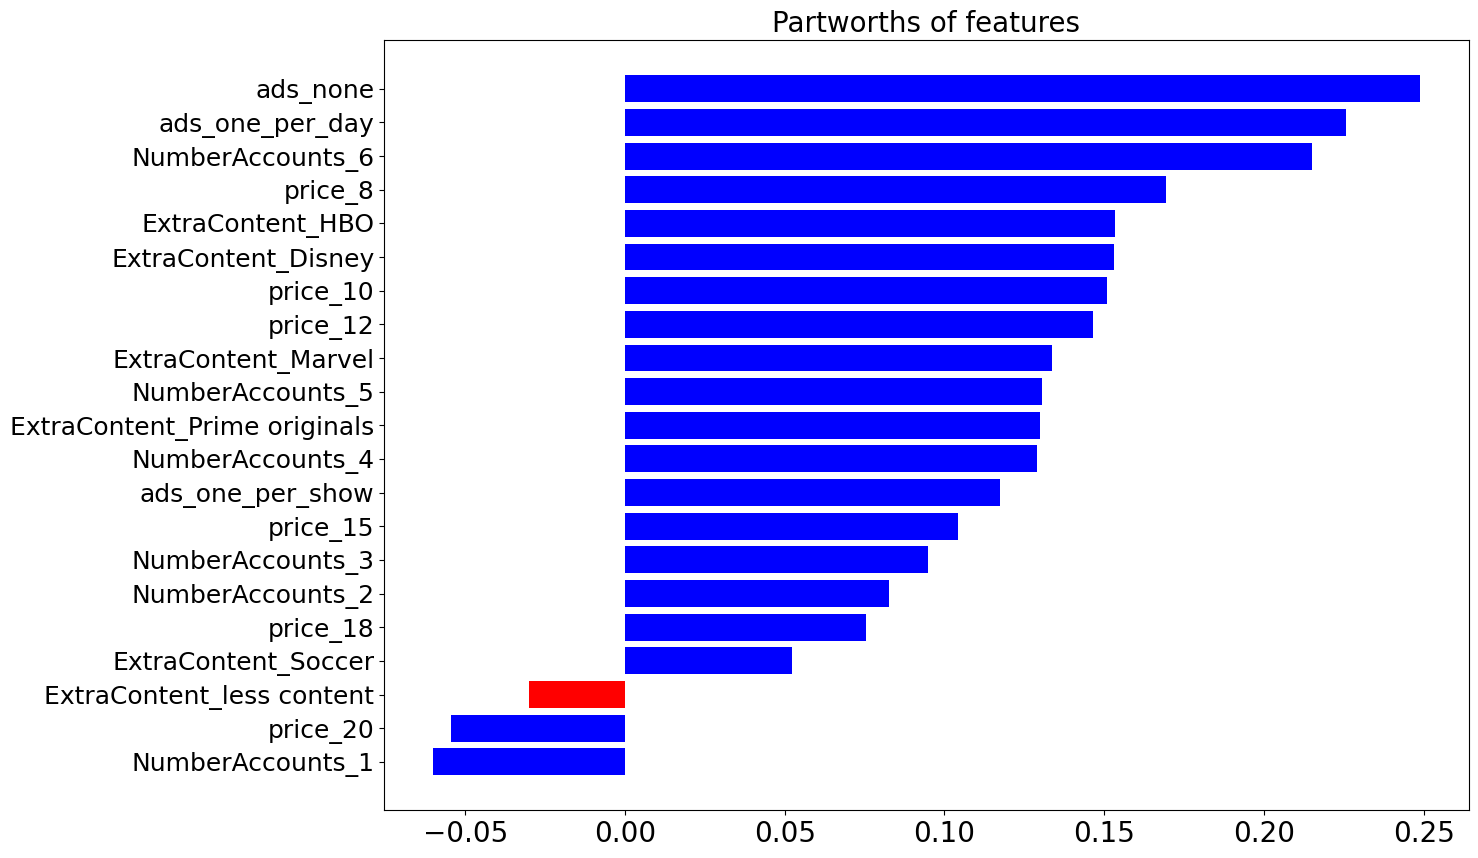

In [ ]:
#Plotting
f, ax = plt.subplots(figsize = (14, 10))
plt.title('Partworths of features', fontsize = 20)
values = df_results['partworth']
xbar = np.arange(len(values))
plt.barh(xbar, values, color = df_results['color'])
plt.yticks(xbar, labels = df_results['param_name'], fontsize = 18)
plt.xticks(fontsize = 20)
plt.show()

#Specific drivers

In [ ]:
#Specific drivers
attributes = []
coefficients = []
for i in range(len(df_results)):
  if df_results.iloc[i,0].find("price") > -1:
    attributes.append(df_results.iloc[i, 0])
    coefficients.append(df_results.iloc[i, 1])

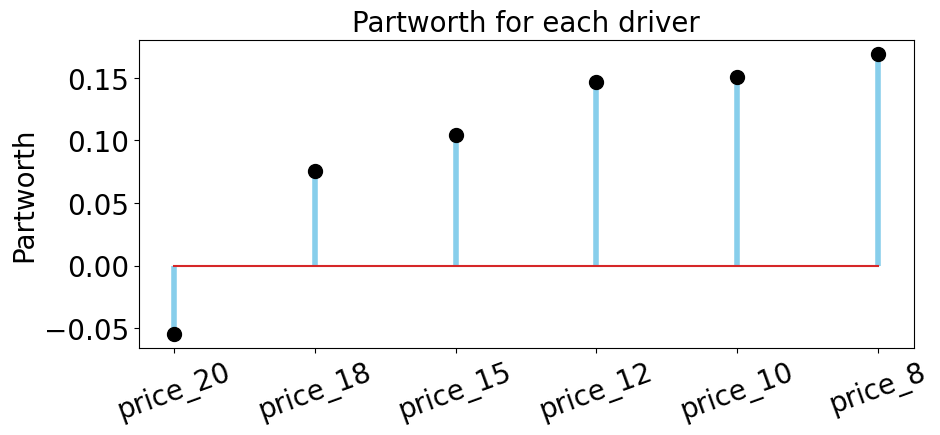

In [ ]:
#Plotting
f, ax = plt.subplots(figsize = (10, 4))
plt.title('Partworth for each driver', fontsize = 20)
(markers, stemlines, baseline) = plt.stem(attributes, coefficients)
plt.setp(stemlines, linestyle = "-", color = "skyblue", linewidth = 4)
plt.setp(markers, color = "black", markersize = 10)
plt.ylabel('Partworth', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 20)
plt.yticks(fontsize = 20)
plt.show()

#Feature importance

In [ ]:
#Coefficients of features
features_part_worth = dict()
for key, coeff in model.params.items():
  split_key = key.split('_')
  feature = split_key[0]
  if feature not in features_part_worth:
    features_part_worth[feature] = list()
  features_part_worth[feature].append(coeff)

features_part_worth

{'NumberAccounts': [-0.05999160933742071,
  0.08260496266776315,
  0.09470569527677665,
  0.1289086230854451,
  0.13060993233162688,
  0.21520793325218607],
 'price': [0.16934283127678523,
  0.15084555117115453,
  0.14651728664654867,
  0.10423235524421481,
  0.07540075639421506,
  -0.054293243456541074],
 'ExtraContent': [0.15295168988347627,
  0.1533636746850919,
  0.13368116308585395,
  0.12982664362141041,
  0.05228328785011105,
  -0.03006092184956643],
 'ads': [0.24875633032670794, 0.22583778940481702, 0.1174514175448525]}

In [ ]:
#Feature importance: max(x) - min(x)
importance_per_feature = {k: max(v) - min(v) for k, v in features_part_worth.items()}
importance_per_feature

{'NumberAccounts': 0.27519954258960677,
 'price': 0.2236360747333263,
 'ExtraContent': 0.18342459653465834,
 'ads': 0.13130491278185544}

In [ ]:
#Check total
print(sum(importance_per_feature.values()))
total_feature_importance = sum(importance_per_feature.values())

0.8135651266394468


In [ ]:
#Relative importance
relative_importance_per_feature = {
    k: round(100 * v/total_feature_importance,1) for k, v in importance_per_feature.items()
}
relative_importance_per_feature

{'NumberAccounts': 33.8, 'price': 27.5, 'ExtraContent': 22.5, 'ads': 16.1}

In [ ]:
#Build a df for plotting
df_importances = pd.DataFrame(list(relative_importance_per_feature.items()),
                              columns = ['feature', 'relative_importance']
                              ).sort_values(by = 'relative_importance')
df_importances

,feature,relative_importance
3,ads,16.1
2,ExtraContent,22.5
1,price,27.5
0,NumberAccounts,33.8


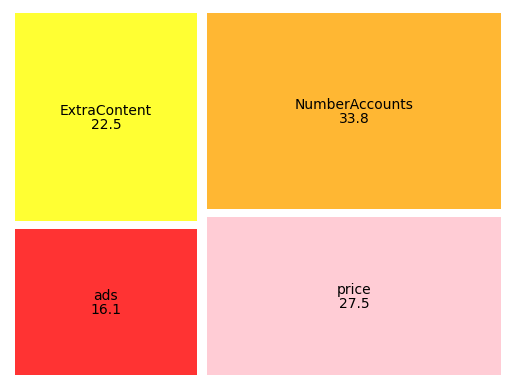

In [ ]:
#Treemap
squarify.plot(sizes = df_importances['relative_importance'],
              label = df_importances['feature'],
              alpha = 0.8,
              color = ['red', 'yellow', 'pink', 'orange'],
              value = df_importances['relative_importance'],
              pad = 1)
plt.axis('off')
plt.show()

#Interaction terms

In [ ]:
#Create interaction term
df['content_ads'] = df.ExtraContent + '_' + df.ads
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show


In [ ]:
#Remove unneeded varaibles
df_interaction = df.drop(columns = ['ExtraContent', 'ads'])
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [ ]:
#Isolate X and Y
y = df_interaction.selected
x = df_interaction.drop(columns = ['selected', 'customerid'])

In [ ]:
#Transform into dummy variables
x_dummy = pd.get_dummies(x, columns = x.columns)

In [ ]:
#Logistic regression
model = sm.OLS(y, x_dummy, family = sm.families.Binomial()).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


#Interaction terms results

In [ ]:
#Retrieving results
df_results = pd.DataFrame({'param_name': model.params.keys(),
                           'partworth': model.params.values}
                          ).sort_values(by = 'partworth')
df_results.head()

,param_name,partworth
29,content_ads_less content_one_per_show,-0.167056
26,content_ads_Soccer_one_per_show,-0.045434
28,content_ads_less content_one_per_day,-0.028690
17,content_ads_HBO_one_per_show,-0.012399
25,content_ads_Soccer_one_per_day,0.012522


In [ ]:
#Looking at specific drivers
attributes = []
coefficients = []
for i in range(len(df_results)):
  if df_results.iloc[i,0].find('content_ads') > -1:
    if df_results.iloc[i,0].find('none') == -1:
      if df_results.iloc[i,0].find('less') == -1:
        attributes.append(df_results.iloc[i,0])
        coefficients.append(df_results.iloc[i,1])

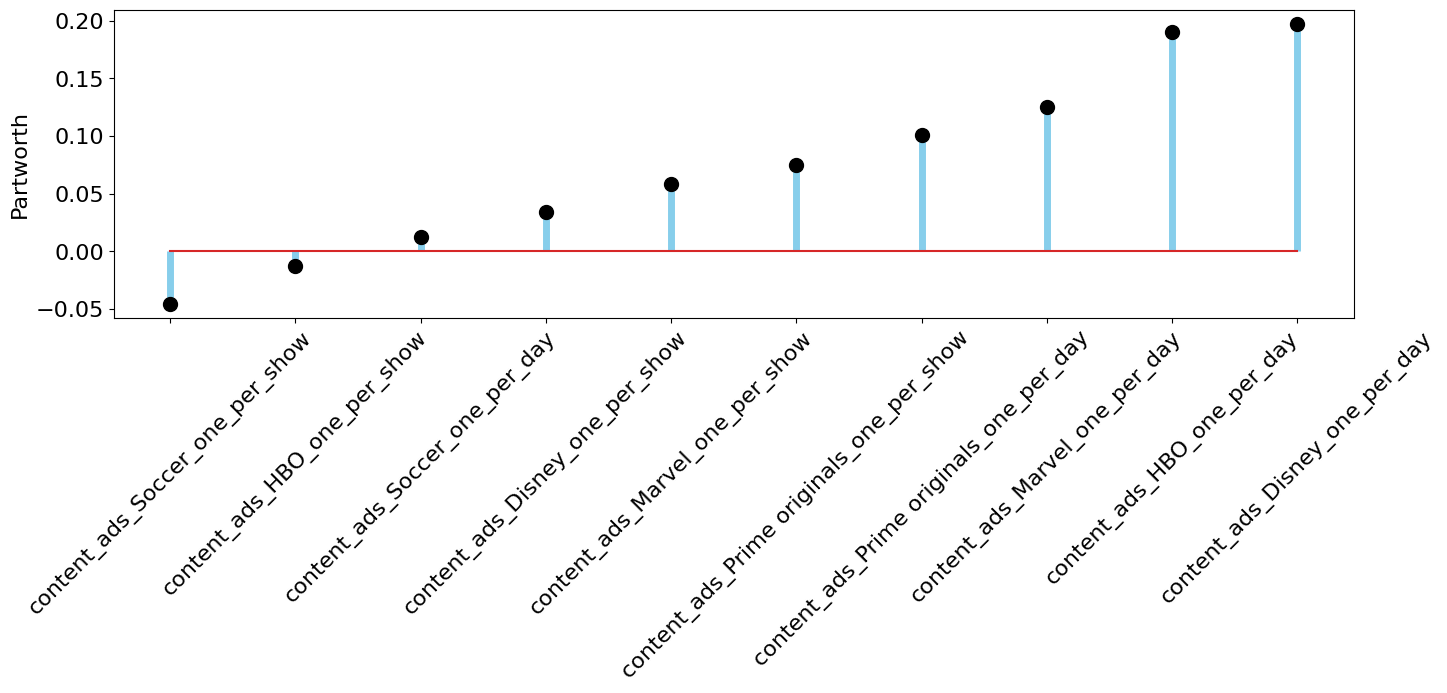

In [ ]:
#Plotting
f, ax = plt.subplots(figsize = (16, 4))
(markers, stemlines, baseline) = plt.stem(attributes, coefficients)
plt.setp(stemlines, linestyle = '-', color = "skyblue", linewidth = 5)
plt.setp(markers, color = "black", markersize = 10)
plt.ylabel("Partworth", fontsize = 16)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.show()